
# K-mean vs Gaussian mixture and assumptions

In [1]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import mixture

In [2]:
def compare_algorithms(X, y, k):
    
    # Fit and label kmeans
    km_y_pred = KMeans(n_clusters=k, random_state=random_state).fit_predict(X)
    
    # Fit and label gaussian mixutre
    gm_y_pred = mixture.GaussianMixture(n_components=k, covariance_type='full').fit_predict(X)

    # Plot comparisons
    plt.figure(figsize=(16, 8))
    
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title('True clusters')
    
    plt.subplot(132)
    plt.scatter(X[:, 0], X[:, 1], c=km_y_pred)
    plt.title("K-Means")
    
    plt.subplot(133)
    plt.scatter(X[:, 0], X[:, 1], c=gm_y_pred)
    plt.title("Gaussian Mixture")
    
    plt.show()

## Incorrect number of clusters

In [3]:
# Generate sample data
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

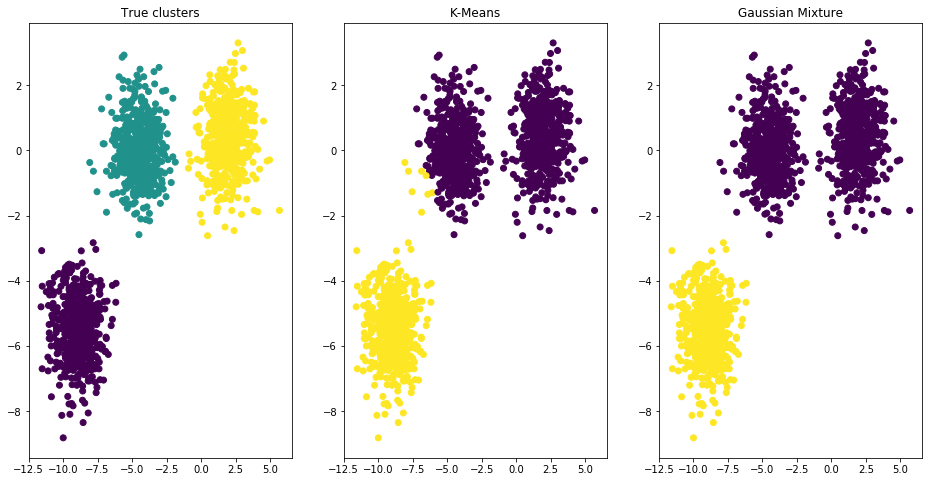

In [4]:
compare_algorithms(X, y, 2)

## Non-spherical data

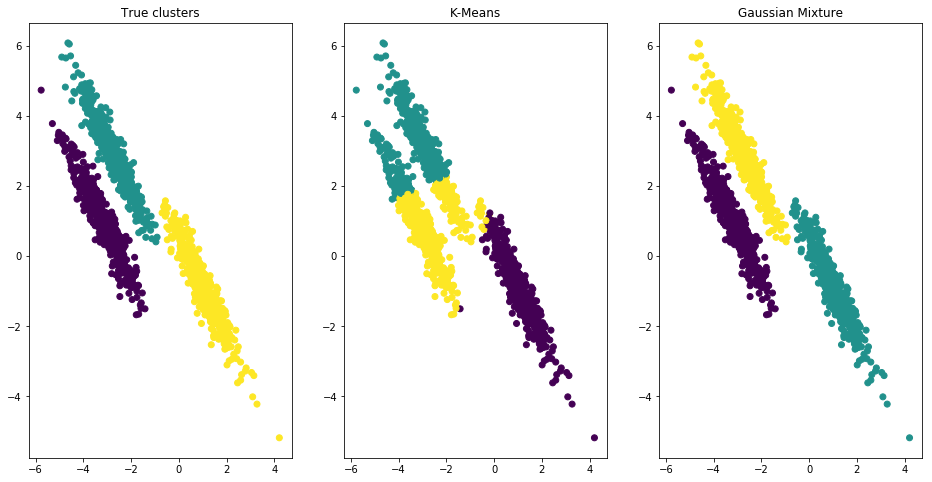

In [5]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

compare_algorithms(X_aniso, y, 3)

##  Different variance (ie densities)

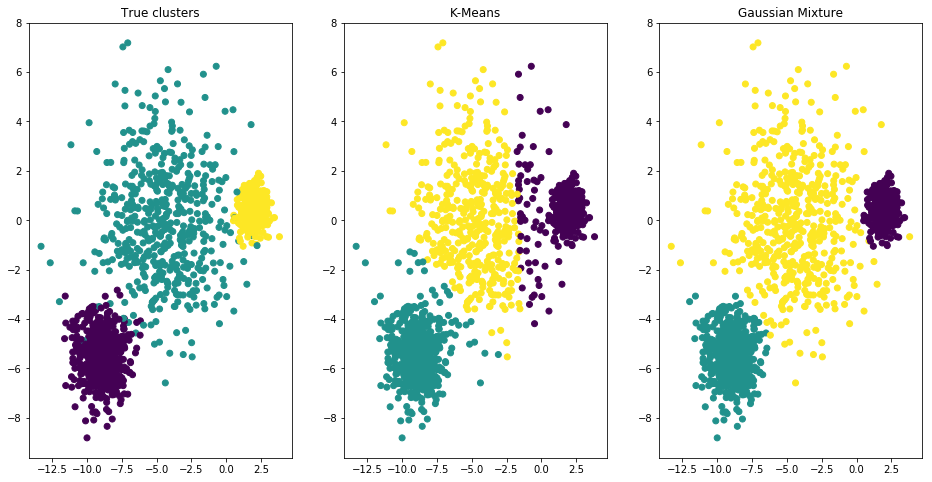

In [6]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

compare_algorithms(X_varied, y_varied, 3)

## Unevenly sized blobs

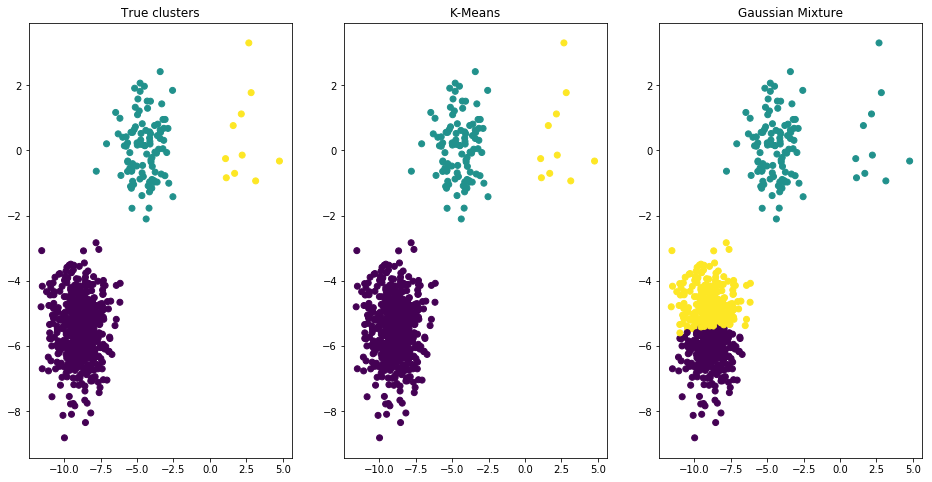

In [7]:
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_filtered = np.vstack((np.full((500,1),0), np.full((100,1),1), np.full((10,1),2))).reshape(-1)

compare_algorithms(X_filtered, y_filtered, 3)

## Kmeans

PRO:
- most notably being fast and scalable, 

Con:
- it is necessary to run the algorithm several times to avoid sub-optimal solutions,
- plus you need to specify the number of clusters, which can be quite a hassle.
- K-Means does not behave very well when
    - the clusters have varying sizes, 
    - different densities,
    - or non-spherical shapes. 

##  Gaussian Mixture

Pro:
- Adapts to size, orientation, densities

Con:
- need to specify number of Gaussian distributions (unless you go Bayesian)
- does not scale well